# Distribuição de $\hat{\sigma}^2$ e $S^2$

Temos que 

$$
n \frac{\hat{\sigma}^2}{\sigma^2} = \frac{1}{\sigma^2} \sum_{i=1}^n (X_i-\mu)^2
$$

onde $\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^n (X_i-\mu)^2$ segue uma distribuição de $\chi^2$ com $n$ graus de liberdade. Adicionalmente
$$
(n-1) \frac{S^2}{\sigma^2} = \frac{1}{\sigma^2} \sum_{i=1}^n (X_i-\bar{X})^2
$$
onde $S^2 = \frac{1}{(n-1)}\sum_{i=1}^n (X_i-\bar{X})^2$ segue uma distribuição de $\chi^2$ com $(n-1)$ graus de liberdade.

In [39]:
do_the_job <- function(n, tamanho=1000, mu=10, sigma=2, seed=12345) {
    
    y1 <- rep(0, tamanho)
    y2 <- rep(0, tamanho)
    
    # laço sobre todas as médias
    for (j in 1:tamanho) {
        x <- rnorm (n, mean=mu, sd=sigma)
        m <- mean(x)
        y1[j] <- sum((x-mu)^2)/sigma^2
        y2[j] <- (n-1)*sd(x)^2/sigma^2
    }
    
    library (ggplot2)
    
    fun.1 <- function (x) dchisq(x, df=n)
    fun.2 <- function (x) dchisq(x, df=n-1)
    
    df <- as.data.frame(y1)
    p <- ggplot(df, aes(x=y1)) +
        geom_histogram(aes(y=..density..), binwidth=density(df$y1)$bw) +
        stat_function(fun = fun.1) + xlim(min(y1)*0.9,max(y1)*1.1)
    
    print (p)
    
    df2 <- as.data.frame(y2)
    p <- ggplot(df, aes(x=y2)) +
        geom_histogram(aes(y=..density..), binwidth=density(df2$y2)$bw) +
        stat_function(fun = fun.2) + xlim(min(y2)*0.9,max(y2)*1.1)
    
    print (p)    
    
}

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


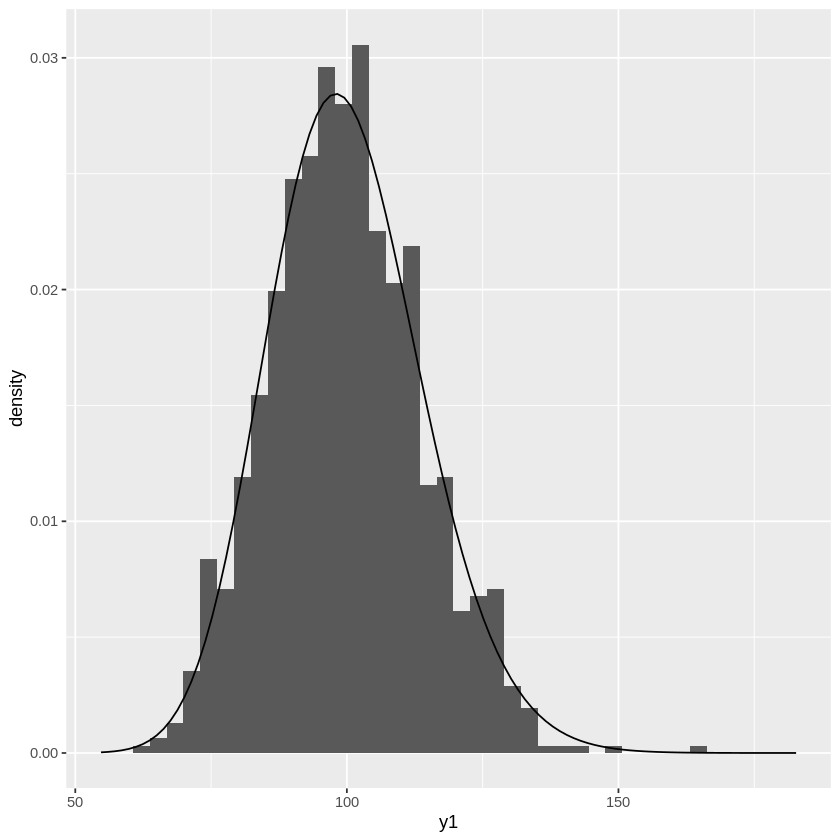

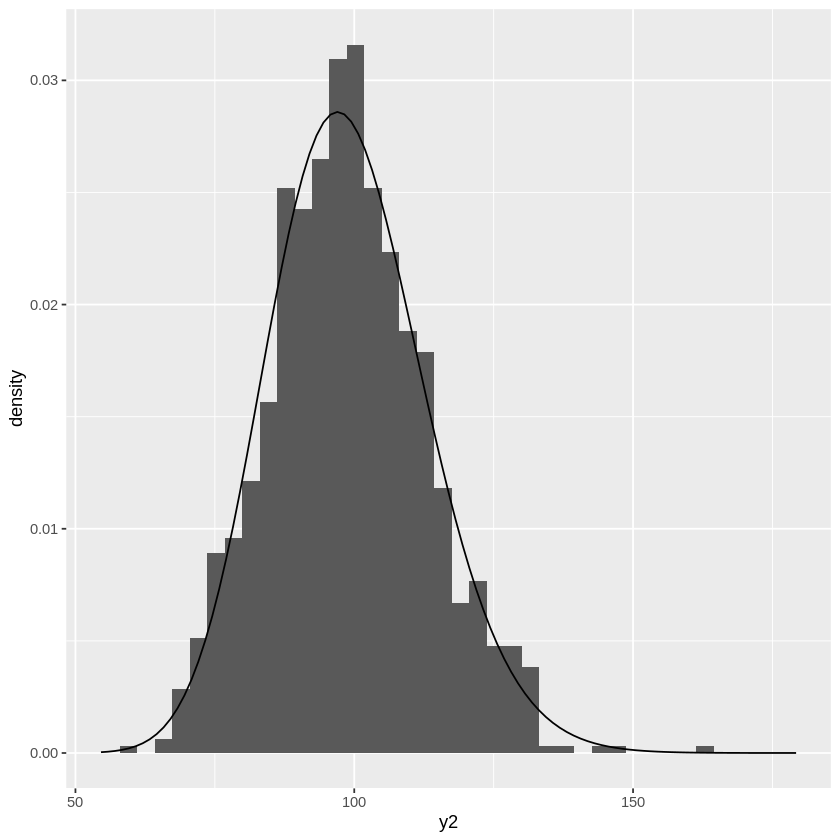

In [40]:
do_the_job (100)